In [77]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import keras.layers as ly

In [78]:
# Loading dataset
mnist = keras.datasets.mnist

In [79]:
#Data Preprocessing
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x=x_test
x_train=x_train.reshape((60000,28*28))
x_test=x_test.reshape((10000,28*28))

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [80]:
# Adding the layers and building the architecture
model = keras.models.Sequential();

model.add(ly.Dense(512,activation='relu', input_shape=(28*28,)))
model.add(ly.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 512)               401920    
                                                                 
 dense_24 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# setting optimizers, lossses , etc...
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [82]:
model.fit(x_train, y_train, epochs = 5, batch_size = 120)

Epoch 1/5
500/500 [==============================] - 4s 6ms/step - loss: 0.2597 - accuracy: 0.9250
Epoch 2/5
500/500 [==============================] - 3s 5ms/step - loss: 0.1074 - accuracy: 0.9682
Epoch 3/5
500/500 [==============================] - 3s 6ms/step - loss: 0.0699 - accuracy: 0.9786
Epoch 4/5
500/500 [==============================] - 3s 6ms/step - loss: 0.0509 - accuracy: 0.9848
Epoch 5/5
500/500 [==============================] - 3s 6ms/step - loss: 0.0387 - accuracy: 0.9882


In [83]:
# Testing the Model ...
loss, acc = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', acc*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0651 - accuracy: 0.9802
Test loss: 0.06510582566261292
Test accuracy: 98.01999926567078


In [84]:
# prediction
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


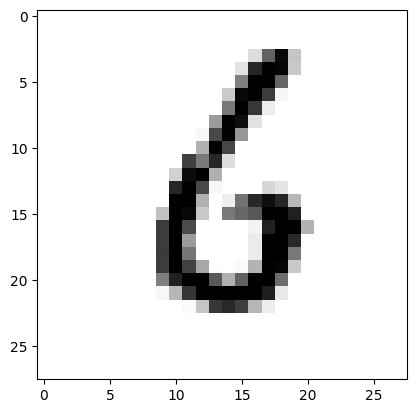


Predicted Output= 6


In [85]:
idx = 50
plt.imshow(x[idx],cmap='gray_r')
plt.show()
print()
print("Predicted Output=",np.argmax(predictions[idx]))

In [86]:
model.save('mnist_model_ANN')